<h2>Importing libraries</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

<h2>Data Collection and Processing</h2>

In [2]:
#Load the dataset into a pandas dataframe
car_dataset = pd.read_csv('../input/vehicle-dataset-from-cardekho/car data.csv')

In [3]:
#showing the first 10 row of the dataframe
car_dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
#checking the number of rows
car_dataset.shape[0]

301

In [5]:
#checking the number of columns 
car_dataset.shape[1]

9

In [6]:
#Getting info about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#Getting descriptive statistics about the dataset
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
#cheking for the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Dealing with categorical data

Most machine learning algorithms cannot handle categorical variables unless we convert them to numerical values

In [9]:
#checking the distribution of categorical data

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


<h2>Encoding categorical data</h2>

In [10]:
#Encoding "Fuel type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

#Encoding "Seller_type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

#Encoding "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [11]:
#checking the change
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


<h2>Data and Target Split </h2>

In [12]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [13]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


<h2>Train and Test Split</h2>

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.25,random_state=0)

<h2>Model training</h2>

<h3>1. Linear Regression</h3>

In [16]:
#loading model
lin_reg_model = LinearRegression()

In [17]:
#fitting with the model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

<h3>Model Evalaution</h3>

In [18]:
#Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [19]:
#R squared Error
from sklearn.metrics import accuracy_score
from sklearn import metrics

error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error on training data: ",error_score)

R squared Error on training data:  0.8797157389756147


<h3>Visualizing Actual and Predicted Prices</h3>

#### Training data prediction Plot

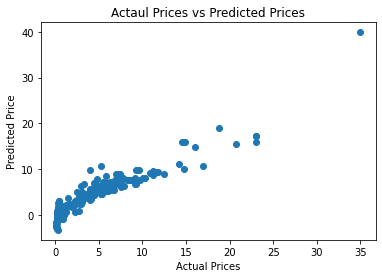

In [20]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Price")
plt.title("Actaul Prices vs Predicted Prices")
plt.show()

                                         Now trying with test data

In [21]:
#Prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [22]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error on tset data: ",error_score)

R squared Error on tset data:  0.8619745435369578


#### Test data prediction Plot


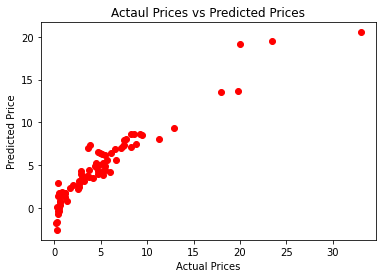

In [23]:
plt.scatter(Y_test,test_data_prediction,color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Price")
plt.title("Actaul Prices vs Predicted Prices")
plt.show()

<h3>2. Lasso Regression</h3>

In [24]:
#loading the linear regression model
from sklearn.linear_model import Lasso
lass_reg_model = Lasso()

In [25]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

<h3>Model Evalaution</h3>

In [26]:
#Prediction on the training Data
training_data_prediction = lass_reg_model.predict(X_train)

In [27]:
#R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared error on training : ",error_score)

R Squared error on training :  0.8397990185794106


<h3>Visualize the Actuals Price vs Predicted Prices</h3>

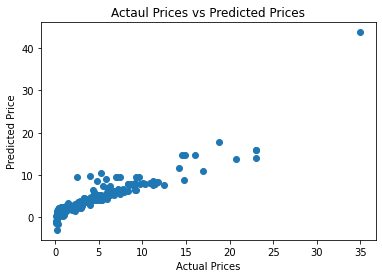

In [28]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Price")
plt.title("Actaul Prices vs Predicted Prices")
plt.show()

In [29]:
#Prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [30]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error on testing : ",error_score)

R squared Error on testing :  0.8146779062313625


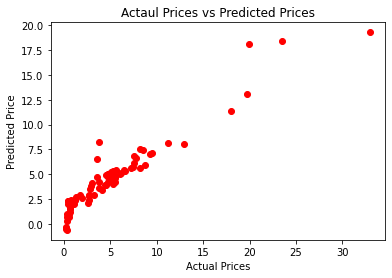

In [31]:
plt.scatter(Y_test,test_data_prediction,color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Price")
plt.title("Actaul Prices vs Predicted Prices")
plt.show()